In [41]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from figure_formatting import figure_formatting as ff

ff.set_formatting()

In [10]:
x = np.arange(10)
y = np.random.random(size=x.size)

def model(x, m, c):
    return m*x + c

def chi_squared(x, y, m, c):
    return np.sum((y-model(x, m, c))**2)


1053.7037037037037


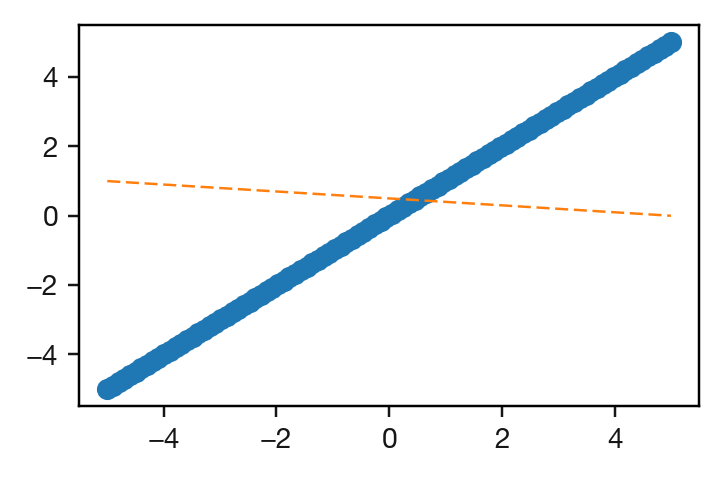

In [42]:
plt.plot(x, y, 'o')

m = -0.1
c = 0.5

plt.plot(x, model(x, m, c), '--')

print(chi_squared(x, y, m, c))

In [4]:
y

array([0.29618037, 0.16124494, 0.86077156, 0.66890599, 0.82140385,
       0.39701487, 0.73856333, 0.89767332, 0.8585839 , 0.05965668])

TypeError: Input z must be 2D, not 0D

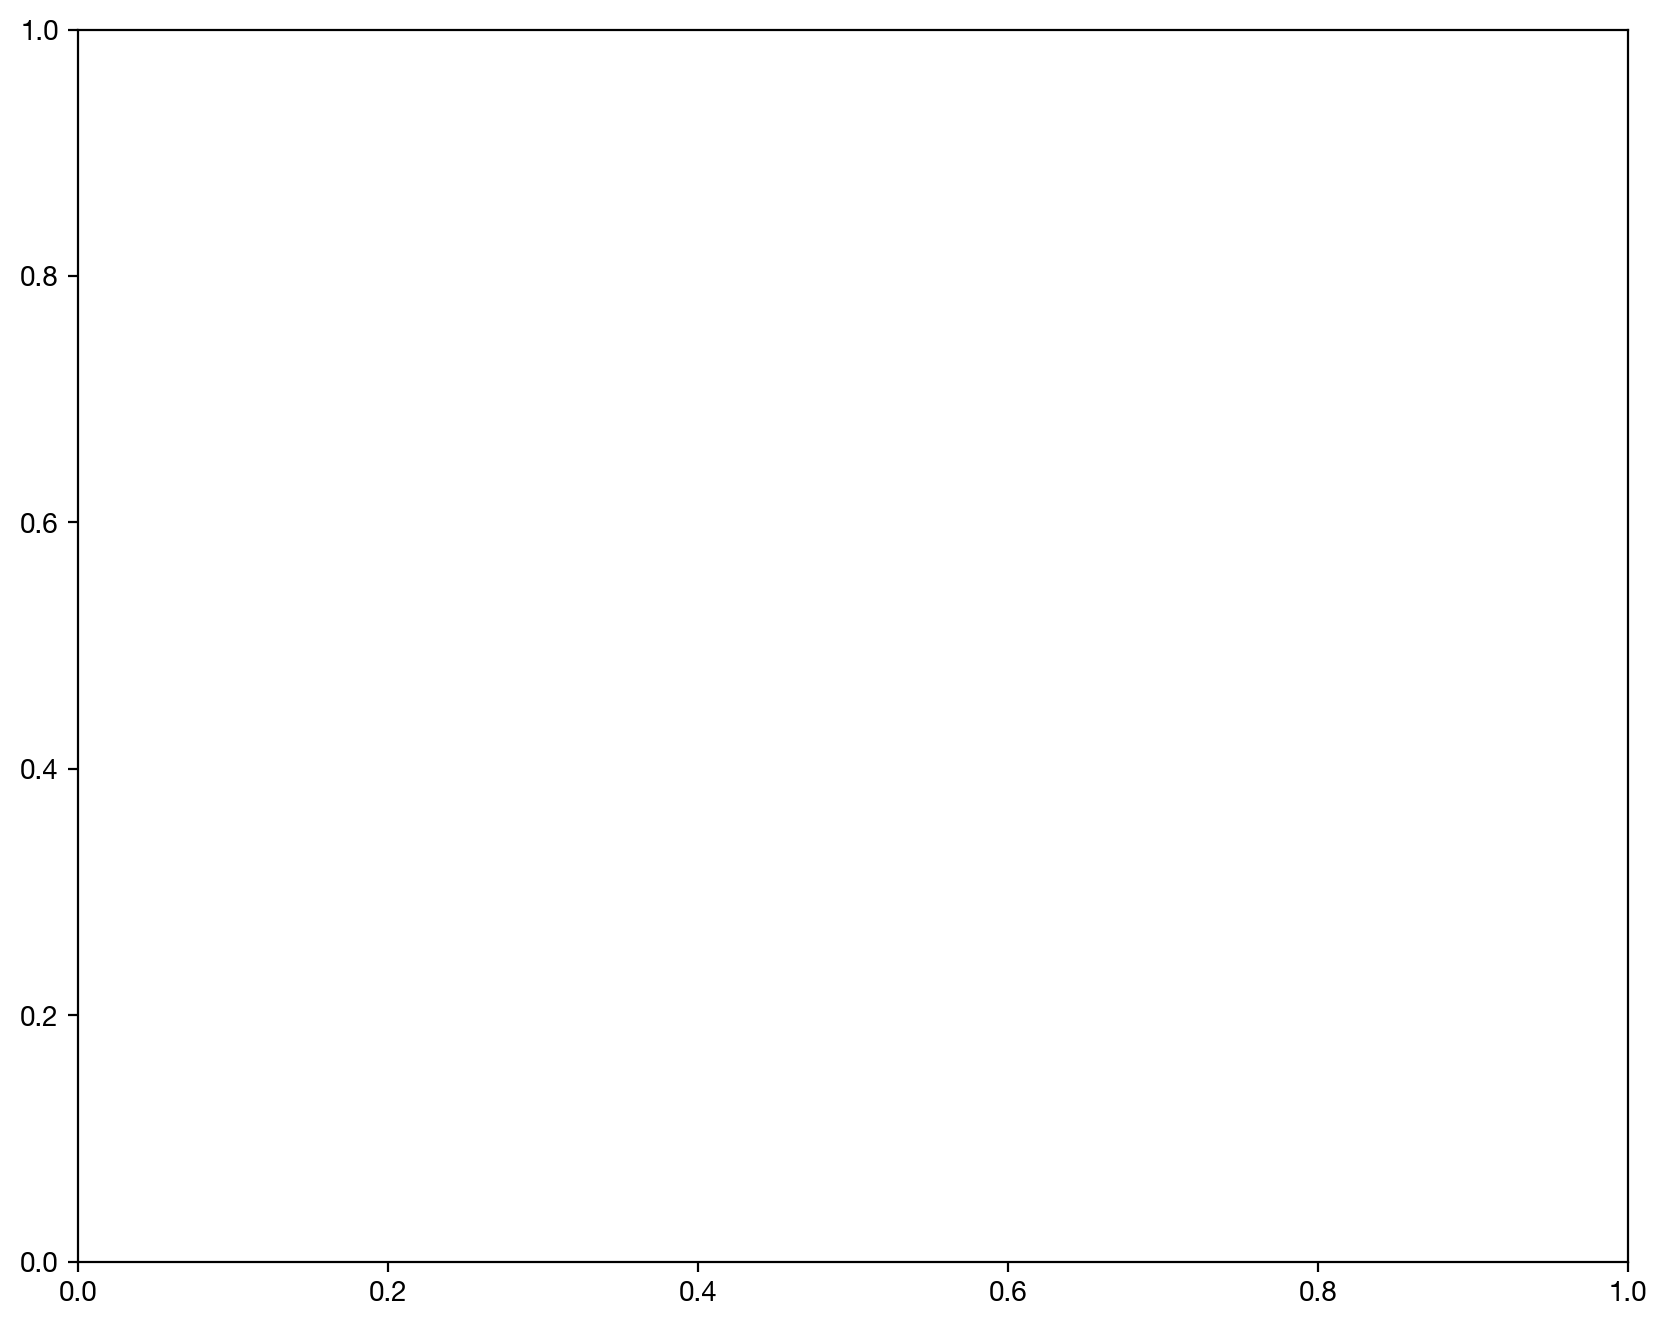

In [17]:
# Create a grid of x and y values
m = np.linspace(-0.1, 0.1, 100)  # 100 points from -5 to 5
c = np.linspace(-1, 1, 100)
M, C = np.meshgrid(m, c)  # Create 2D arrays from x and y

# Calculate Z values (function output) for each X,Y pair
Z = chi_squared(x, y, M, C)

# Create the contour plot
plt.figure(figsize=(10, 8))
# Create filled contours
contours = plt.contourf(X, Y, Z, levels=20, cmap='viridis')
# Add contour lines
plt.contour(X, Y, Z, levels=20, colors='black', alpha=0.3)
# Add a colorbar
plt.colorbar(contours, label='f(x,y)')

# Customize the plot
plt.title('Contour Plot of f(x,y) = sin(sqrt(x² + y²))')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [21]:
C

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.97979798, -0.97979798, -0.97979798, ..., -0.97979798,
        -0.97979798, -0.97979798],
       [-0.95959596, -0.95959596, -0.95959596, ..., -0.95959596,
        -0.95959596, -0.95959596],
       ...,
       [ 0.95959596,  0.95959596,  0.95959596, ...,  0.95959596,
         0.95959596,  0.95959596],
       [ 0.97979798,  0.97979798,  0.97979798, ...,  0.97979798,
         0.97979798,  0.97979798],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

-1.7834607801408928 8.745666335933942


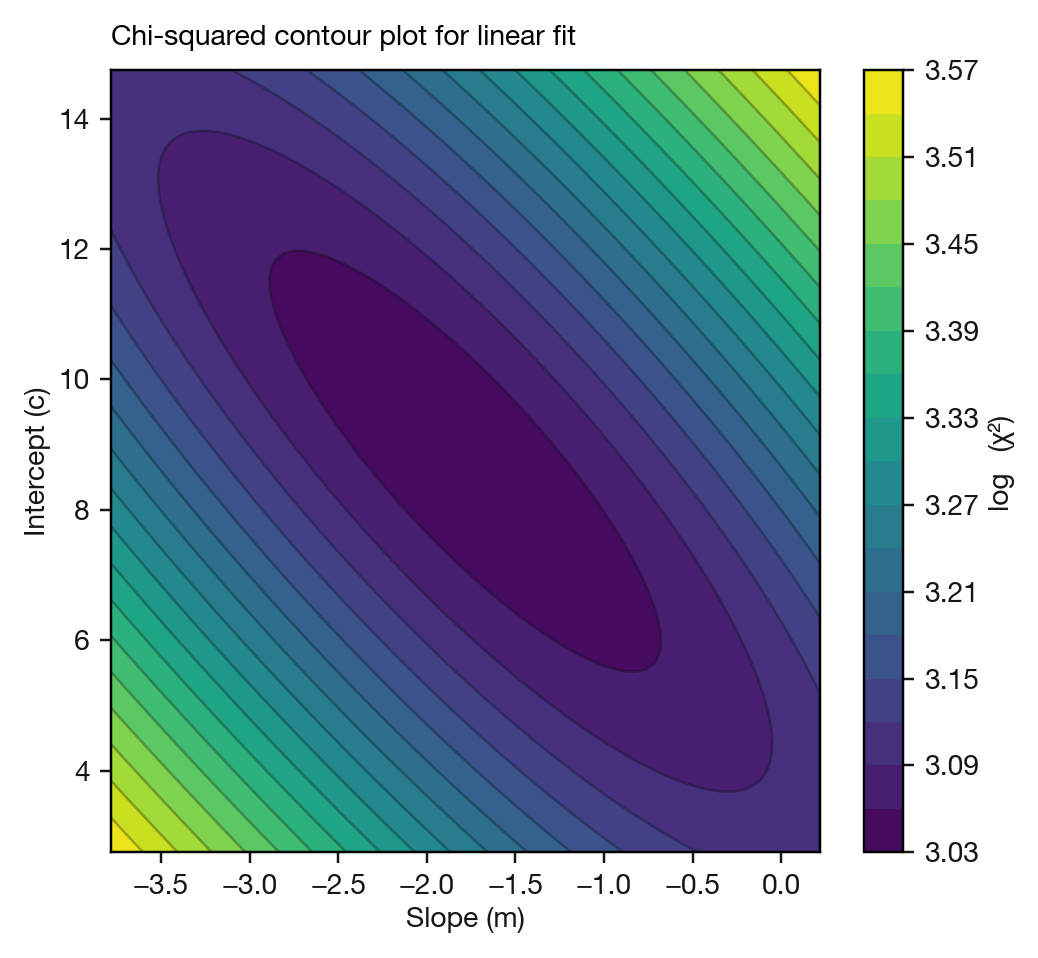

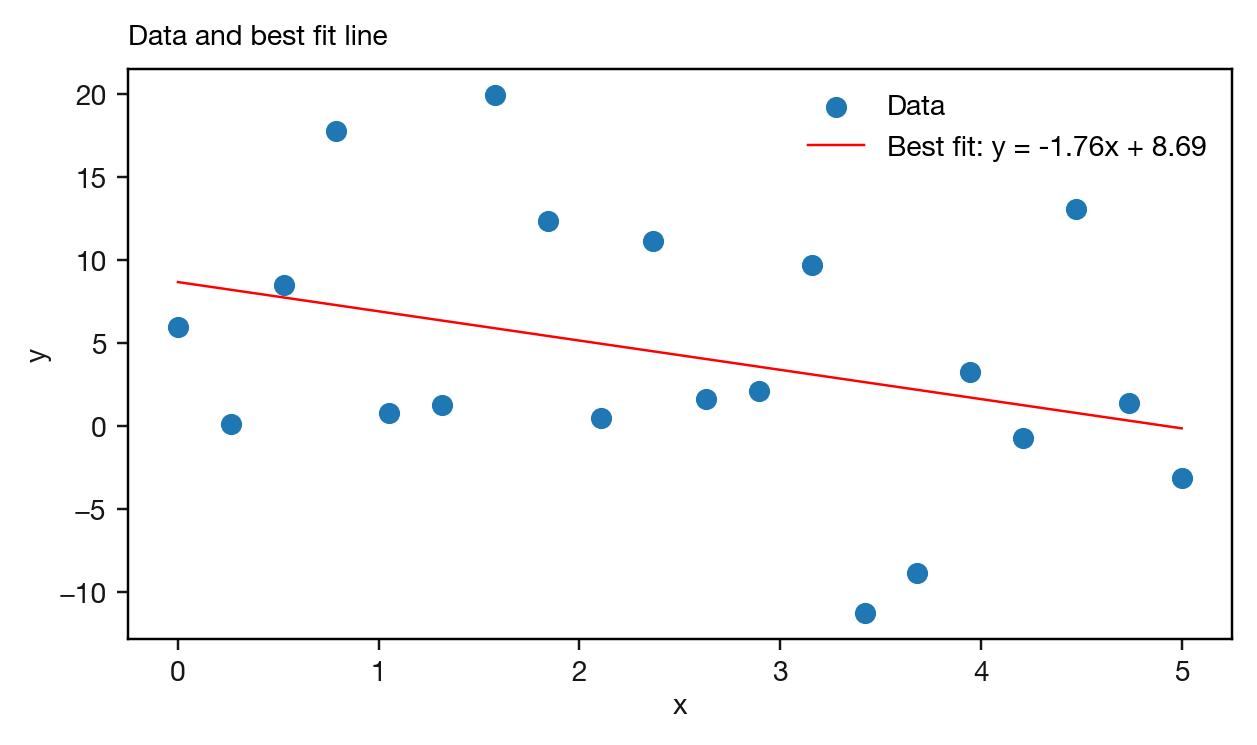

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def generate_linear_data(m_true: float, c_true: float, x_range: tuple, 
                        n_points: int, noise_sigma: float) -> tuple:
    """Generates synthetic data from a linear model with normal noise.
    
    Args:
        m_true: True slope of the linear relationship.
        c_true: True intercept of the linear relationship.
        x_range: Tuple of (min, max) for x values.
        n_points: Number of data points to generate.
        noise_sigma: Standard deviation of the normal noise to add.
        
    Returns:
        tuple: A tuple containing:
            - x_data (ndarray): Generated x values.
            - y_data (ndarray): Generated y values with noise.
            
    Example:
        >>> x_data, y_data = generate_linear_data(2.0, 1.0, (0, 5), 20, 0.5)
    """
    x_data = np.linspace(x_range[0], x_range[1], n_points)
    y_perfect = m_true * x_data + c_true
    noise = np.random.normal(0, noise_sigma, n_points)
    y_data = y_perfect + noise
    
    return x_data, y_data

def model(x: np.ndarray, m: float, c: float) -> np.ndarray:
    """Computes linear model prediction.
    
    Args:
        x: Input x values.
        m: Slope parameter.
        c: Intercept parameter.
    
    Returns:
        Model predictions y = mx + c.
    """
    return m*x + c

def chi_squared(x: np.ndarray, y: np.ndarray, m: float, c: float) -> float:
    """Computes chi-squared statistic for linear model.
    
    Args:
        x: Input x values.
        y: Observed y values.
        m: Slope parameter.
        c: Intercept parameter.
    
    Returns:
        Chi-squared statistic Σ(y - (mx + c))².
    """
    return np.sum((y-model(x, m, c))**2)

# Generate synthetic data
np.random.seed(42)  # for reproducibility
m_true, c_true = 2.0, 1.0  # true parameters
x_data, y_data = generate_linear_data(
    m_true=m_true,
    c_true=c_true,
    x_range=(0, 5),
    n_points=20,
    noise_sigma=10.0
)

result = linregress(x_data, y_data)

print(result.slope, result.intercept)

dm = 2
dc = 6

# Create a grid of parameter values (m and c)
# Choose ranges that make sense for your data
m_range = np.linspace(result.slope - dm, result.slope + dm, 100)  # Adjust range based on expected slope
c_range = np.linspace(result.intercept - dc, result.intercept + dc, 100)  # Adjust range based on expected intercept
M, C = np.meshgrid(m_range, c_range)

# Calculate chi-squared for each parameter combination
Z = np.zeros_like(M)
for i in range(len(m_range)):
    for j in range(len(c_range)):
        Z[j,i] = chi_squared(x_data, y_data, M[j,i], C[j,i])

# Create the contour plot
plt.figure(figsize=(4.5, 4))

# Create filled contours with log scale (often better for chi-squared)
contours = plt.contourf(M, C, np.log10(Z), levels=20, cmap='viridis')
# Add contour lines
plt.contour(M, C, np.log10(Z), levels=20, colors='black', alpha=0.3)
# Add a colorbar
plt.colorbar(contours, label='log₁₀(χ²)')

# Find and plot the minimum
min_idx = np.unravel_index(np.argmin(Z), Z.shape)
best_m = M[min_idx]
best_c = C[min_idx]
# plt.plot(best_m, best_c, 'o', markersize=15, label=f'Minimum χ² at m={best_m:.2f}, c={best_c:.2f}')

# Customize the plot
plt.title('Chi-squared contour plot for linear fit')
plt.xlabel('Slope (m)')
plt.ylabel('Intercept (c)')
# plt.legend()

# Optional: Add the data and best fit line in a separate subplot
plt.figure(figsize=(5,3))
plt.scatter(x_data, y_data, label='Data')
x_fit = np.linspace(min(x_data), max(x_data), 100)
plt.plot(x_fit, model(x_fit, best_m, best_c), 'r-', 
         label=f'Best fit: y = {best_m:.2f}x + {best_c:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and best fit line')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
M[0,0]

-0.1